[View in Colaboratory](https://colab.research.google.com/github/freesemt/stewart-acid-base-model/blob/master/notebooks/fig_02.ipynb)

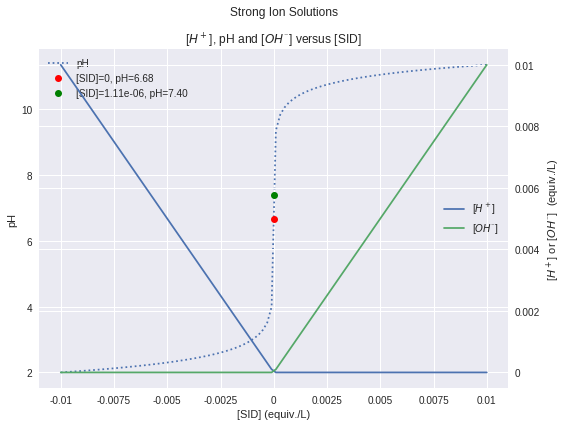

In [0]:
import numpy                as np
import matplotlib.pyplot    as plt
from matplotlib.ticker import FormatStrFormatter
import matplotlib.ticker    as ticker

# FuncFormatter can be used as a decorator
@ticker.FuncFormatter
def major_formatter(x, pos):
    return "%.3g" % x

Kw  = 4.4e-14       # at 37℃

fig = plt.figure( figsize=(8, 6) )
fig.suptitle( "Strong Ion Solutions" )

ax  = fig.add_subplot(111)

x   = np.linspace(-0.01, 0.01, 100 )
ax.set_title( "[$H^+$], pH and [$OH^⁻$] versus [SID]" )
ax.set_xlabel( '[SID] (equiv./L)' )
ax.set_ylabel( 'pH' )
ax_ = ax.twinx()
ax_.set_ylabel( '[$H^+$] or [$OH^⁻$]  (equiv./L)' )
ax.xaxis.set_major_formatter(major_formatter)
ax_.yaxis.set_major_formatter(FormatStrFormatter('%.3g'))
Hion = np.sqrt( Kw + (x/2)**2 ) - x/2
pH  = -np.log10( Hion )
ax.plot( x, pH, ':', label='pH' )
pH_SID0 = -np.log10( np.sqrt( Kw ) )
"""
圧力が1気圧のとき、純水のpHが7.00になるのは24℃付近の狭い温度範囲に限られる。
温度が0℃のときの純水では pH = 7.47、10℃のとき7.27、20℃のとき7.08、
30℃のとき6.92、60℃のとき6.51となる。
https://ja.wikipedia.org/wiki/%E6%B0%B4%E7%B4%A0%E3%82%A4%E3%82%AA%E3%83%B3%E6%8C%87%E6%95%B0
"""
ax.plot( 0, pH_SID0, 'o', color='red', label='[SID]=0, pH=%.3g' % pH_SID0 )

pH74 = 7.4
x_  = Kw / np.power(10, -pH74)      # [SID] = Kw'/[H⁺]
ax.plot( x_, pH74, 'o', color='green', label='[SID]=%.3g, pH=7.40' % x_  )

ax_.plot( x, Hion, label='[$H^+$]' )
ax_.plot( x, np.sqrt( Kw + (x/2)**2 ) + x/2, label='[$OH^⁻$]' )

ax.legend(  )
ax_.legend(  )

fig.tight_layout()
fig.subplots_adjust( top=0.88 )

plt.show()